<a href="https://colab.research.google.com/github/john-s-butler-dit/Numerical-Analysis-Python/blob/master/Chapter%2005%20-%20IVP%20Consistent%20Convergence%20Stability/501_Consistent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consistency of a Multistep method

#### John S Butler 
john.s.butler@tudublin.ie  
[Course Notes](https://johnsbutler.netlify.com/files/Teaching/Numerical_Analysis_for_Differential_Equations.pdf)    [Github](https://github.com/john-s-butler-dit/Numerical-Analysis-Python)

## Overview
A one-step or multistep method is used to approximate the solution of an initial value problem of the form
\begin{equation} \frac{dy}{dt}=f(t,y), \end{equation} 
with the initial condition
\begin{equation}  y(a)=\alpha.\end{equation} 
The method should only be used if it satisfies the three criteria:
1. that difference equation is __consistent__ with the differential equation;
2. that the numerical solution is __convergent__ to the exact answer of the differential equation;
3. that the numerical solution is __stable__.

In the notebooks in this folder we will illustate examples of consisten and inconsistent, convergent and non-convergent, and stable and unstable methods. 

## Introduction to Consistency
In this notebook we will illustate an __inconsistent__ method.

In [1]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/SXH6WHMLTII" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/Users/johnbutler/opt/anaconda3/lib/python3.8/site-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


### Definition
A one-step and multi-step methods with local truncation error $\tau_{i}(h)$ at the $i$th step is said
to be __consistent__ with the differential equation it approximates if 
\begin{equation}\lim_{h \rightarrow 0} (\max_{1 \leq i \leq N}|\tau_{i}(h)|)=0 \end{equation} 
where
\begin{equation}\tau_{i}(h)=\frac{y_{i+1}-y_{i}}{h}-F(t_i,y_i,h,f) \end{equation} 
As $h \rightarrow 0$ does $F(t_i,y_i,h,f) \rightarrow f(t,y)$. 

All the Runge Kutta, and Adams methods are consistent in this course. This notebook will illustrate a non-consistent method which with great hubris I will call the Abysmal-Butler methods.

## 2-step Abysmal Butler Method 

The 2-step Abysmal Butler difference equation is given by
\begin{equation}w_{i+1} = w_{i} + \frac{h}{2}(4f(t_i,w_i)-3f(t_{i-1},w_{i-1})), \end{equation} 
which can be written as 
\begin{equation}\frac{w_{i+1} -w_{i}}{h} = \frac{1}{2}(4f(t_i,w_i)-3f(t_{i-1},w_{i-1})). \end{equation} 

## Intial Value Problem
To illustrate consistency we will apply the method to a linear intial value problem given by
\begin{equation} y^{'}=t-y, \ \ (0 \leq t \leq 2),\end{equation} 
with the initial condition
\begin{equation}y(0)=1,\end{equation} 
with the exact solution
\begin{equation}y(t)= 2e^{-t}+t-1.\end{equation} 

## Python Libraries

In [2]:
import numpy as np
import math 
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings
warnings.filterwarnings("ignore")

### Defining the function
$$ f(t,y)=t-y.\end{equation} 

In [3]:
def myfun_ty(t,y):
    return t-y

## Discrete Interval
Defining the step size  $h$  from the interval range  $a \leq t\leq b$  and number of steps  $N$ 
\begin{equation}h=\frac{b - a}{N}.\end{equation} 
 
This gives the discrete time steps,
\begin{equation}t_i=t_0+ih,\end{equation} 
where  $t_0=a.$

Here the interval is  $0\leq t \leq 2$  and number of step  40 
\begin{equation}h=\frac{2−0}{40}=0.05.\end{equation} 
 
This gives the discrete time steps,
\begin{equation}t_i=0+i0.5,\end{equation}
for  $i=0,1,⋯,40.$

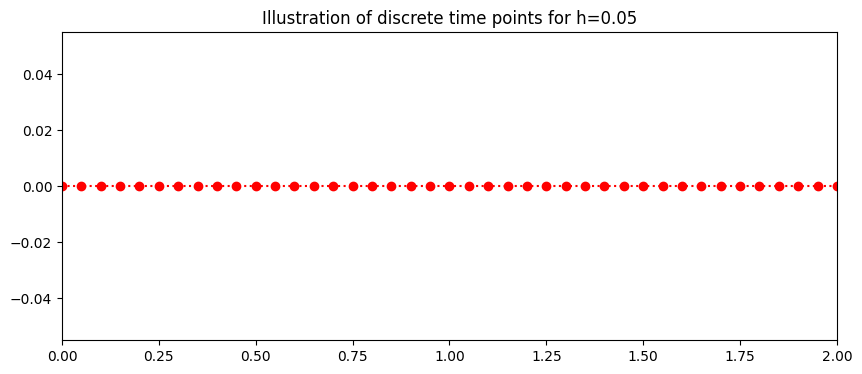

In [4]:
# Start and end of interval
b=2
a=0
# Step size
N=40
h=(b-a)/(N)
t=np.arange(a,b+h,h)
fig = plt.figure(figsize=(10,4))
plt.plot(t,0*t,'o:',color='red')
plt.xlim((0,2))
plt.title('Illustration of discrete time points for h=%s'%(h))
plt.show()

## Exact Solution
The initial value problem has the exact solution
$$y(t)=2e^{-t}+t-1.\end{equation} 
The figure below plots the exact solution.

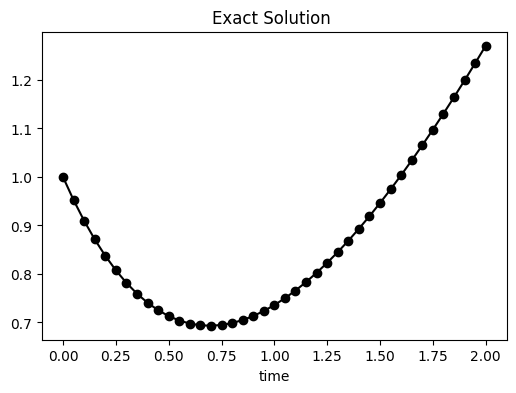

In [5]:
IC=1 # Intial condtion
y=(IC+1)*np.exp(-t)+t-1
fig = plt.figure(figsize=(6,4))
plt.plot(t,y,'o-',color='black')
plt.title('Exact Solution ')
plt.xlabel('time')
plt.show()

In [6]:
# Initial Condition
w=np.zeros(N+1)
#np.zeros(N+1)
w[0]=IC



## 2-step Abysmal Butler Method 

The 2-step Abysmal Butler difference equation is
\begin{equation}w_{i+1} = w_{i} + \frac{h}{2}(4f(t_i,w_i)-3f(t_{i-1},w_{i-1})).\end{equation} 

For $i=0$ the system of difference equation is:
\begin{equation}w_{1} = w_{0} + \frac{h}{2}(4(t_0-w_0)-3(t_{-1}-w_{-1})) \end{equation} 
this is not solvable as <font color='red'> $w_{-1}$ </font> is unknown.

For $i=1$ the difference equation is:
\begin{equation}w_{2} = w_{1} + \frac{h}{2}(4(t_1-w_1)-3(t_{0}-w_{0})),\end{equation}
this is not solvable as <font color='red'> $w_{1}$  </font> is unknown. $w_1$ can be  approximated using a one step method. Here, as the exact solution is known,
\begin{equation}w_1=2e^{-t_1}+t_1-1.\end{equation} 


In [7]:
### Initial conditions
w=np.zeros(len(t))
w0=np.zeros(len(t))
w[0]=IC
w[1]=y[1]

### Loop

In [8]:
for k in range (1,N):
    w[k+1]=(w[k]+h/2.0*(4*myfun_ty(t[k],w[k])-3*myfun_ty(t[k-1],w[k-1])))   


### Plotting solution

In [9]:
def plotting(t,w,y):
    fig = plt.figure(figsize=(10,4))
    plt.plot(t,y, 'o-',color='black',label='Exact')
    plt.plot(t,w,'^:',color='red',label='Abysmal-Butler')
    plt.xlabel('time')
    plt.legend()
    plt.show 

The plot below shows the exact solution (black) and the Abysmal-Butler approximation (red) of the intial value problem.

The Numerical approximation does not do a good job of approximating the exact solution and that is because it is inconsistent.

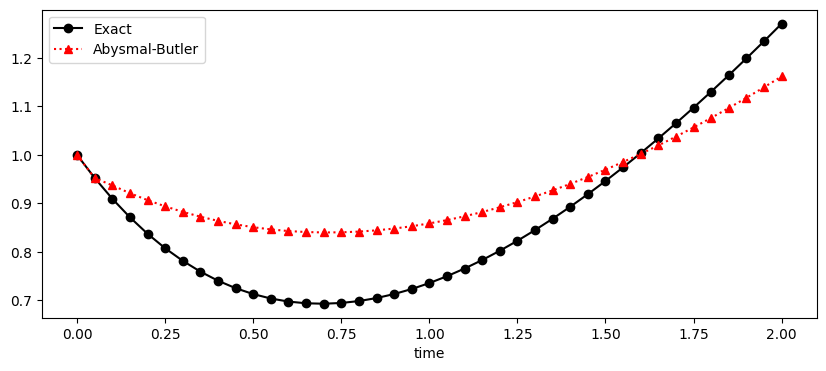

In [10]:
plotting(t,w,y)

## Consistency 
To prove that the Abysmal-Butler method does not satisfy the consistency condition,
\begin{equation} \tau_{i}(h)=\frac{y_{i+1}-y_{i}}{h}-\frac{1}{2}[4(f(t_i,y_i)-3f(t_{i-1},y_{i-1})]. \end{equation} 
As $h \rightarrow 0$  
\begin{equation} \frac{1}{2}[4f(t_i,y_i)-3f(t_{i-1},y_{i-1})] \rightarrow \frac{f(t_i,y_i)}{2}.\end{equation} 
While as $h \rightarrow 0$  
\begin{equation} \frac{y_{i+1}-y_{i}}{h} \rightarrow y^{'}=f(t_i,y_i).\end{equation} 
Hence as $h \rightarrow 0$ \begin{equation} \frac{y_{i+1}-y_{i}}{h}-\frac{1}{2}[4(f(t_i,y_i)-3f(t_{i-1},y_{i-1})]\rightarrow f(t_i,y_i)-\frac{f(t_i,y_i)}{2}=\frac{f(t_i,y_i)}{2},\end{equation} 
which violates the consistency condition (inconsistent).


In [11]:
d = {'time': t[0:5], 'Abysmal Butler': w[0:5],'Exact':y[0:5],'Error':np.abs(y[0:5]-w[0:5])}
df = pd.DataFrame(data=d)
df

,time,Abysmal Butler,Exact,Error
0,0.00,1.000000,1.000000,0.000000
1,0.05,0.952459,0.952459,0.000000
2,0.10,0.937213,0.909675,0.027538
3,0.15,0.921176,0.871416,0.049760
4,0.20,0.906849,0.837462,0.069388
